In [72]:
import matplotlib.pyplot as plt

In [73]:
class KalmanFilter:
    def __init__(
        self,
        estimate: float,
        estimate_variance: float,
    ) -> None:
        self.__init_process(estimate, estimate_variance)

    def __init_process(
        self,
        estimate: float,
        estimate_variance: float,
    ):
        self.estimate_height: float = estimate
        self.estimate_covariance: float = estimate_variance
        self.predicated_height: float = self.estimate_height
        self.predicated_convariance: float = self.estimate_covariance
        self.kalman_gain: float = 0

    def update(self, measurement, measurement_variance):
        self.kalman_gain = self.__kalman_gain_update(
            self.predicated_convariance, measurement_variance
        )

        self.estimate_covariance = self.__covariance_update(
            self.predicated_convariance, self.kalman_gain
        )

        self.estimate_height = self.__state_update(
            self.predicated_height, measurement, self.kalman_gain
        )

        self.predicated_convariance = self.__covariance_extrapolation(
            self.estimate_covariance
        )

        self.predicated_height = self.__state_extrapolation(self.estimate_height)

        return self.estimate_height, self.estimate_covariance, self.predicated_height, self.predicated_convariance, self.kalman_gain

    def __state_update(self, predicated: float, measurement: float, gain: float):
        return predicated + gain * (measurement - predicated)

    def __covariance_update(self, predicated: float, gain: float):
        return (1 - gain) * predicated

    def __kalman_gain_update(self, predicated_variance: float, measuremend_covariace: float):
        return predicated_variance / (predicated_variance + measuremend_covariace)

    def __state_extrapolation(self, estimate: float):
        return estimate

    def __covariance_extrapolation(self, estimate_covariance: float):
        return estimate_covariance

In [74]:
data = [49.03, 48.44, 55.21, 49.98, 50.6, 52.61, 45.87, 42.64, 48.26, 55.84]

kal_filter = KalmanFilter(60, 225)

result: list = []
for i in data:
    result.append(kal_filter.update(i, 25))

In [75]:
time = [x for x in range(10)]

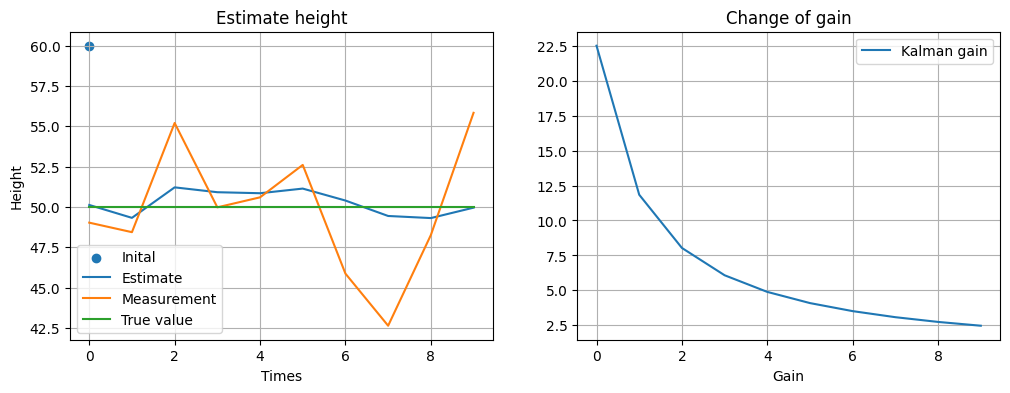

In [76]:
fig = plt.figure()
fig.set_size_inches(12, 4)

ax1 = fig.add_subplot(121)

ax1.scatter(0, 60, label = "Inital")

ax1.plot(time, [item[0] for item in result], label = "Estimate")
ax1.plot(time, data, label = "Measurement")
ax1.plot(time, [50 for x in range(10)], label = "True value")

ax1.set_title("Estimate height")
ax1.set_xlabel("Times")
ax1.set_ylabel("Height")

ax1.legend()
ax1.grid()

ax3 = fig.add_subplot(122)

ax3.plot(time, [item[3] for item in result], label = "Kalman gain")

ax3.set_title("Change of gain")
ax3.set_xlabel("Times")
ax3.set_xlabel("Gain")

ax3.legend()
ax3.grid()

plt.show()

In [77]:
import random
data_size = 100

data_random = [50 + random.uniform(-20, 20) for x in range(data_size)]

result_random = []
rand_times = [x for x in range(data_size)]

rand_filter = KalmanFilter(60, 225)

for i in data_random:
    result_random.append(rand_filter.update(i, 25))

In [78]:
from scipy.stats import norm

z_score = norm.ppf(0.95)

confidence_result_random = [(item[0] + (z_score * (item[3] ** 0.5)), item[0] - (z_score * (item[3] ** 0.5))) for item in result_random]

confidence_result_random

[(66.71969408324857, 51.115242446981846),
 (59.431877329235334, 48.11121827113351),
 (54.5378514506107, 45.21240793629026),
 (58.29254761804149, 50.18017950195051),
 (58.376274540940116, 51.10066145055404),
 (59.12390132107498, 52.4701407866979),
 (56.5851983293924, 50.41699722832438),
 (54.65050318083364, 48.875036516790146),
 (53.09863819065227, 47.64932730483234),
 (54.23293135652897, 49.06010600924814),
 (53.12448824166123, 48.18992736080681),
 (53.661771655830854, 48.93531953812445),
 (53.88345468019361, 49.34082318280504),
 (53.194298238619176, 48.8155835198829),
 (53.04339805137865, 48.81204700454813),
 (52.81696390454069, 48.71903414236021),
 (53.036332425635166, 49.05994995046137),
 (52.48033864762219, 48.61529227159119),
 (52.74137615817999, 48.9788087604325),
 (53.558345304883595, 49.89051508784424),
 (53.562465068506484, 49.982558344724666),
 (53.34909743172326, 49.85107996831618),
 (52.99904574393191, 49.5775433828128),
 (52.82824472666378, 49.478446528817486),
 (52.930956

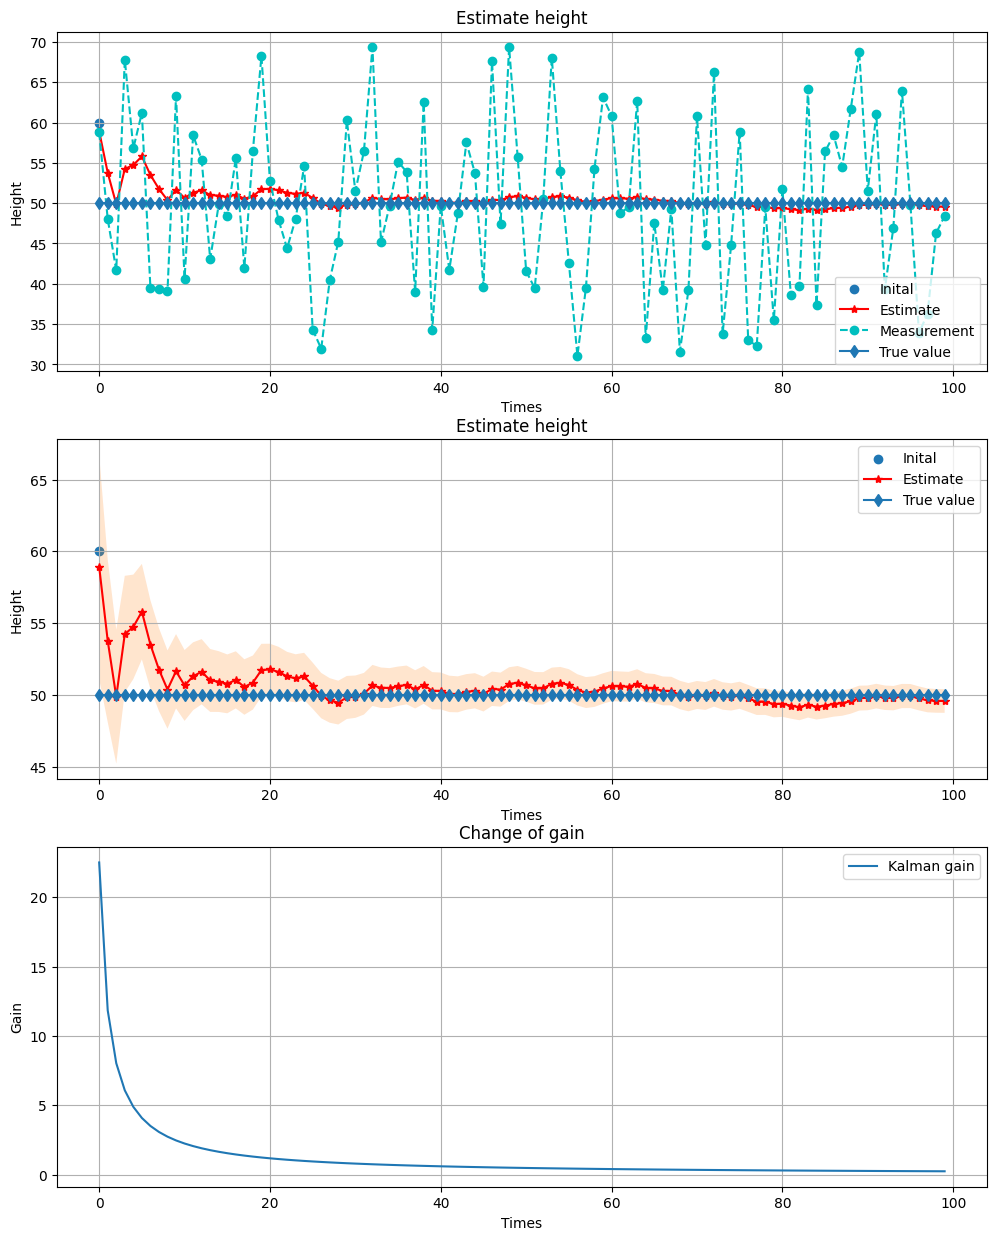

In [79]:
fig = plt.figure()
fig.set_size_inches(12, 15)

ax1 = fig.add_subplot(311)

ax1.scatter(0, 60, label="Inital")

ax1.plot(rand_times, [item[0] for item in result_random], "r-*", label="Estimate")
ax1.plot(rand_times, data_random, "c--o", label="Measurement")
ax1.plot(rand_times, [50 for x in range(data_size)], "-d", label="True value")

ax1.set_title("Estimate height")
ax1.set_xlabel("Times")
ax1.set_ylabel("Height")

ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(312)

ax2.scatter(0, 60, label="Inital")

ax2.plot(rand_times, [item[0] for item in result_random], "r-*", label="Estimate")
ax2.fill_between(
    rand_times,
    [item[0] for item in confidence_result_random],
    [item[1] for item in confidence_result_random],
    alpha = 0.2
)
ax2.plot(rand_times, [50 for x in range(data_size)], "-d", label="True value")

ax2.set_title("Estimate height")
ax2.set_xlabel("Times")
ax2.set_ylabel("Height")

ax2.legend()
ax2.grid()

ax3 = fig.add_subplot(313)

ax3.plot(rand_times, [item[3] for item in result_random], label="Kalman gain")

ax3.set_title("Change of gain")
ax3.set_xlabel("Times")
ax3.set_ylabel("Gain")

ax3.legend()
ax3.grid()

plt.show()